On ESPN if you watch the gamecast of a game they give an updated win percentage as the game progresses. We are going to produce a similar prediction, calculating win percentage for a home team given point differential, quarter, and time left in the game.

We are calculating:  
    p(home_win|[time_left, point_diff]=[t,p]) 

We do so by counting up the number of games where [t,p] occurs and then counting up the number of games where that [t,p] occurs and the home team won.
    
    

In [164]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/nba-playbyplay-data-20182019/NBA-PBP-2018-2019.csv


In [86]:
df = pd.read_csv('/kaggle/input/nba-playbyplay-data-20182019/NBA-PBP-2018-2019.csv')
df.head()

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,...,FreeThrowNum,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss
0,/boxscores/201810160BOS.html,regular,TD Garden Boston Massachusetts,October 16 2018,8:00 PM,BOS,1,720,PHI,Jump ball: J. Embiid vs. A. Horford (B. Simmon...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J. Embiid - PHI,A. Horford - BOS,B. Simmons
1,/boxscores/201810160BOS.html,regular,TD Garden Boston Massachusetts,October 16 2018,8:00 PM,BOS,1,700,PHI,R. Covington misses 3-pt jump shot from 27 ft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/boxscores/201810160BOS.html,regular,TD Garden Boston Massachusetts,October 16 2018,8:00 PM,BOS,1,700,PHI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/boxscores/201810160BOS.html,regular,TD Garden Boston Massachusetts,October 16 2018,8:00 PM,BOS,1,675,PHI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/boxscores/201810160BOS.html,regular,TD Garden Boston Massachusetts,October 16 2018,8:00 PM,BOS,1,673,PHI,Defensive rebound by D. Saric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
df.columns

Index(['URL', 'GameType', 'Location', 'Date', 'Time', 'WinningTeam', 'Quarter',
       'SecLeft', 'AwayTeam', 'AwayPlay', 'AwayScore', 'HomeTeam', 'HomePlay',
       'HomeScore', 'Shooter', 'ShotType', 'ShotOutcome', 'ShotDist',
       'Assister', 'Blocker', 'FoulType', 'Fouler', 'Fouled', 'Rebounder',
       'ReboundType', 'ViolationPlayer', 'ViolationType', 'TimeoutTeam',
       'FreeThrowShooter', 'FreeThrowOutcome', 'FreeThrowNum', 'EnterGame',
       'LeaveGame', 'TurnoverPlayer', 'TurnoverType', 'TurnoverCause',
       'TurnoverCauser', 'JumpballAwayPlayer', 'JumpballHomePlayer',
       'JumpballPoss'],
      dtype='object')

In [88]:
df['home_pt_diff'] = df.HomeScore - df.AwayScore
df.tail()

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,...,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss,home_pt_diff
613666,/boxscores/201906130GSW.html,playoff,Oracle Arena Oakland California,June 13 2019,9:00 PM,TOR,4,0,TOR,K. Leonard makes free throw 1 of 2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3
613667,/boxscores/201906130GSW.html,playoff,Oracle Arena Oakland California,June 13 2019,9:00 PM,TOR,4,0,TOR,K. Leonard makes free throw 2 of 2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4
613668,/boxscores/201906130GSW.html,playoff,Oracle Arena Oakland California,June 13 2019,9:00 PM,TOR,4,0,TOR,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4
613669,/boxscores/201906130GSW.html,playoff,Oracle Arena Oakland California,June 13 2019,9:00 PM,TOR,4,0,TOR,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4
613670,/boxscores/201906130GSW.html,playoff,Oracle Arena Oakland California,June 13 2019,9:00 PM,TOR,5,0,TOR,End of Game,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4


In [89]:
df['time_left'] = (4-df.Quarter)*720+df.SecLeft
df.tail()

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,...,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss,home_pt_diff,time_left
613666,/boxscores/201906130GSW.html,playoff,Oracle Arena Oakland California,June 13 2019,9:00 PM,TOR,4,0,TOR,K. Leonard makes free throw 1 of 2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3,0
613667,/boxscores/201906130GSW.html,playoff,Oracle Arena Oakland California,June 13 2019,9:00 PM,TOR,4,0,TOR,K. Leonard makes free throw 2 of 2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4,0
613668,/boxscores/201906130GSW.html,playoff,Oracle Arena Oakland California,June 13 2019,9:00 PM,TOR,4,0,TOR,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4,0
613669,/boxscores/201906130GSW.html,playoff,Oracle Arena Oakland California,June 13 2019,9:00 PM,TOR,4,0,TOR,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4,0
613670,/boxscores/201906130GSW.html,playoff,Oracle Arena Oakland California,June 13 2019,9:00 PM,TOR,5,0,TOR,End of Game,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4,-720


In [90]:
# Only need a few of these columns to perform 
df.drop(['URL', 'GameType', 'Location','AwayPlay', 'HomePlay',
       'Shooter', 'ShotType', 'ShotOutcome', 'ShotDist',
       'Assister', 'Blocker', 'FoulType', 'Fouler', 'Fouled', 'Rebounder',
       'ReboundType', 'ViolationPlayer', 'ViolationType', 'TimeoutTeam',
       'FreeThrowShooter', 'FreeThrowOutcome', 'FreeThrowNum', 'EnterGame',
       'LeaveGame', 'TurnoverPlayer', 'TurnoverType', 'TurnoverCause',
       'TurnoverCauser', 'JumpballAwayPlayer', 'JumpballHomePlayer',
       'JumpballPoss', 'AwayScore', 'HomeScore','Quarter','SecLeft'], axis=1, inplace=True)

In [91]:
games_groupby = df.groupby(['Date', 'Time', 'HomeTeam', 'WinningTeam'])
games_groupby.count()

AwayTeam  home_pt_diff  \
Date            Time     HomeTeam WinningTeam                           
April 1 2019    10:00 PM PHO      PHO               453           453   
                7:00 PM  IND      IND               433           433   
                7:30 PM  BOS      BOS               455           455   
                         BRK      MIL               541           541   
                         NYK      NYK               433           433   
...                                                 ...           ...   
October 31 2018 10:30 PM PHO      SAS               451           451   
                7:30 PM  BRK      BRK               571           571   
                8:00 PM  CHI      DEN               488           488   
                         MIN      MIN               494           494   
                         NYK      IND               433           433   

                                               time_left  
Date            Time     HomeTeam WinningTeam             
April 1 2019    10:00 PM PHO      PHO                453  
                7:00 PM  IND      IND                433  
                7:30 PM  BOS      BOS                455  
                         BRK      MIL                541  
                         NYK      NYK                433  
...                                                  ...  
October 31 2018 10:30 PM PHO      SAS                451  
                7:30 PM  BRK      BRK                571  
                8:00 PM  CHI      DEN                488  
                         MIN      MIN                494  
                         NYK      IND                433  

[1312 rows x 3 columns]

In [92]:
games = [x[0] for x in games_groupby ]

In [93]:
home_wins = [int(game[2]==game[3]) for game in games]
home_wins[:10]

[1, 1, 1, 0, 1, 1, 0, 1, 1, 1]

In [94]:
prior_home_win = sum(home_wins)/len(home_wins)
print(prior_home_win)

0.5907012195121951


In [95]:
games_groupby_zip = games_groupby.apply(lambda x: list(zip([t for t in x['time_left']], [p for p in x['home_pt_diff']])))

In [98]:
t_p_win = list(zip(games_groupby_zip, home_wins))

In [108]:
t_p_win[0]

([(2880, 0),
  (2861, 0),
  (2855, 0),
  (2852, 0),
  (2838, 0),
  (2835, 0),
  (2818, 0),
  (2816, 0),
  (2803, 2),
  (2776, 2),
  (2774, 2),
  (2768, 2),
  (2767, 2),
  (2760, 2),
  (2752, 2),
  (2749, 4),
  (2734, 4),
  (2731, 4),
  (2730, 2),
  (2727, 2),
  (2727, 2),
  (2710, 0),
  (2694, 3),
  (2682, 3),
  (2680, 3),
  (2665, 3),
  (2665, 3),
  (2657, 3),
  (2657, 3),
  (2644, 3),
  (2641, 3),
  (2623, 3),
  (2621, 3),
  (2612, 3),
  (2597, 1),
  (2579, 4),
  (2559, 4),
  (2556, 4),
  (2550, 4),
  (2548, 4),
  (2541, 4),
  (2541, 4),
  (2541, 4),
  (2532, 4),
  (2532, 4),
  (2517, 7),
  (2517, 7),
  (2517, 8),
  (2495, 6),
  (2472, 8),
  (2472, 8),
  (2472, 8),
  (2472, 8),
  (2472, 9),
  (2458, 9),
  (2455, 9),
  (2455, 7),
  (2455, 7),
  (2455, 7),
  (2455, 7),
  (2448, 7),
  (2432, 7),
  (2430, 7),
  (2414, 5),
  (2396, 8),
  (2374, 8),
  (2372, 8),
  (2368, 8),
  (2368, 8),
  (2368, 8),
  (2355, 6),
  (2343, 6),
  (2322, 4),
  (2305, 4),
  (2303, 4),
  (2296, 4),
  (2296, 4),

In [200]:
def probability(t,p, t_p_win):
    total_games = 0
    home_wins = 0
    games = []
    for pbp, home_win in t_p_win:
        previous_play = (2880,0)
        occurred=0
        for play in pbp:
            if (p==previous_play[1] or p==play[1]) and (t<=previous_play[0] and t>=play[0]):
                occurred = 1
                games.append((pbp, home_win))
            previous_play = play
        if occurred == 1:
            total_games+=1
            home_wins+=home_win
    return (home_wins, total_games, games, home_wins/total_games*100)

In [209]:
w,t,games,p = probability(0, -2, t_p_win)
print(w,t,p)

40 44 90.9090909090909


Interestingly even with zero seconds left and a lead for the home team there is a possibility for a loss. This is because the zero seconds left is not precise, there could be 0.3 seconds left for example. The below game is an example.

In [204]:
print(games[0])

([(2880, 0), (2860, -2), (2849, -2), (2845, -2), (2833, -5), (2820, -3), (2802, -3), (2799, -3), (2796, -3), (2792, -3), (2782, -3), (2779, -3), (2770, -3), (2763, -3), (2758, -6), (2746, -6), (2738, -4), (2727, -4), (2723, -4), (2716, -4), (2713, -4), (2698, -6), (2685, -3), (2675, -3), (2675, -4), (2675, -5), (2670, -5), (2661, -2), (2648, -2), (2645, -2), (2634, -2), (2630, -2), (2627, 0), (2608, 0), (2605, 0), (2601, 0), (2598, 0), (2587, 0), (2583, 0), (2575, 0), (2572, 0), (2570, -2), (2548, 1), (2530, -1), (2521, -1), (2521, -1), (2521, -1), (2521, -1), (2511, -1), (2507, -1), (2507, -1), (2507, -1), (2507, -1), (2507, -1), (2507, -1), (2507, 0), (2507, 1), (2496, -1), (2483, -1), (2480, -1), (2478, 2), (2465, 2), (2462, 2), (2452, 2), (2448, 2), (2438, -1), (2424, -1), (2424, 0), (2424, 0), (2424, 0), (2424, 0), (2424, 0), (2420, 0), (2404, 0), (2404, -1), (2404, -1), (2404, -1), (2404, -1), (2404, -2), (2391, -2), (2391, -2), (2385, -2), (2382, -2), (2381, -2), (2379, -4), (23

In [192]:
# How important is a 2 point lead for the home team
time = reversed(range(0,2881,15))
prob = [probability(t,2,t_p_win)[3] for t in time]
prob

[60.46511627906976,
 60.55776892430279,
 62.94277929155313,
 65.43909348441926,
 62.71186440677966,
 61.59695817490495,
 63.75545851528385,
 64.39024390243902,
 64.03940886699507,
 63.63636363636363,
 62.5,
 59.47712418300654,
 57.85714285714286,
 59.541984732824424,
 65.54054054054053,
 68.48484848484848,
 63.1578947368421,
 65.06849315068493,
 58.108108108108105,
 56.9620253164557,
 52.41379310344828,
 52.41935483870967,
 49.166666666666664,
 55.00000000000001,
 60.0,
 60.447761194029844,
 60.97560975609756,
 63.565891472868216,
 62.30769230769231,
 59.154929577464785,
 60.15625,
 63.2,
 62.39316239316239,
 67.0,
 63.30275229357798,
 63.06306306306306,
 62.264150943396224,
 50.505050505050505,
 50.526315789473685,
 56.52173913043478,
 58.82352941176471,
 58.76288659793815,
 64.48598130841121,
 66.30434782608695,
 56.470588235294116,
 58.0246913580247,
 65.4320987654321,
 60.0,
 55.55555555555556,
 57.30337078651685,
 62.5,
 61.111111111111114,
 58.88888888888889,
 59.49367088607595,


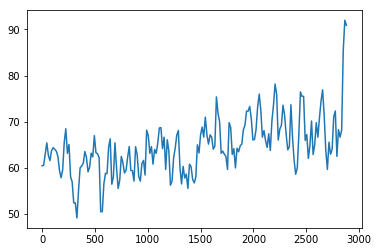

In [196]:
time = range(0,2881,15)
plt.plot([t for t in time], prob)

Above graph of win percentages is not very smooth, would be interesting to consider ways to smooth this graph out. 